# OBJECTIVE

--> Answering some business questions that help to analyze business growth

#### IMPORTING REQUIRED LIBRARIES 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### IMPORTING DATASET

In [2]:
sales_data = pd.read_excel("superstore_sales.xlsx")

#### GETTING FAMILIAR WITH DATASET

In [3]:
#First five rows of the dataset
sales_data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
#Shape of the dataset
sales_data.shape

(51290, 21)

In [5]:
#Columns present in the dataset
sales_data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [6]:
#Summary od dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [7]:
#Checking missing values in dataset
sales_data.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [8]:
#Descriptive statistical summary
sales_data.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


## EXPLORATORY DATA ANALYSIS

#### WHAT IS THE OVERALL SALES TREND?

In [9]:
sales_data['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [10]:
sales_data['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [11]:
#Getting monthl year from dataset
sales_data['month_year'] = sales_data['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [12]:
#Grouping data by Month
df_monthly_trend = sales_data.groupby('month_year').sum().reset_index()
df_monthly_trend.head()

,month_year,sales,quantity,discount,profit,shipping_cost,year
0,2011-01,98898.48886,1463,68.758,8321.80096,10544.7880,870763
1,2011-02,91152.15698,1224,52.252,12417.90698,10681.1630,760158
2,2011-03,145729.36736,1836,74.212,15303.56826,13096.1855,1083929
3,2011-04,116915.76418,2020,80.782,12902.32438,12954.5200,1134204
4,2011-05,146747.83610,2013,82.382,12183.82870,16443.2060,1138226


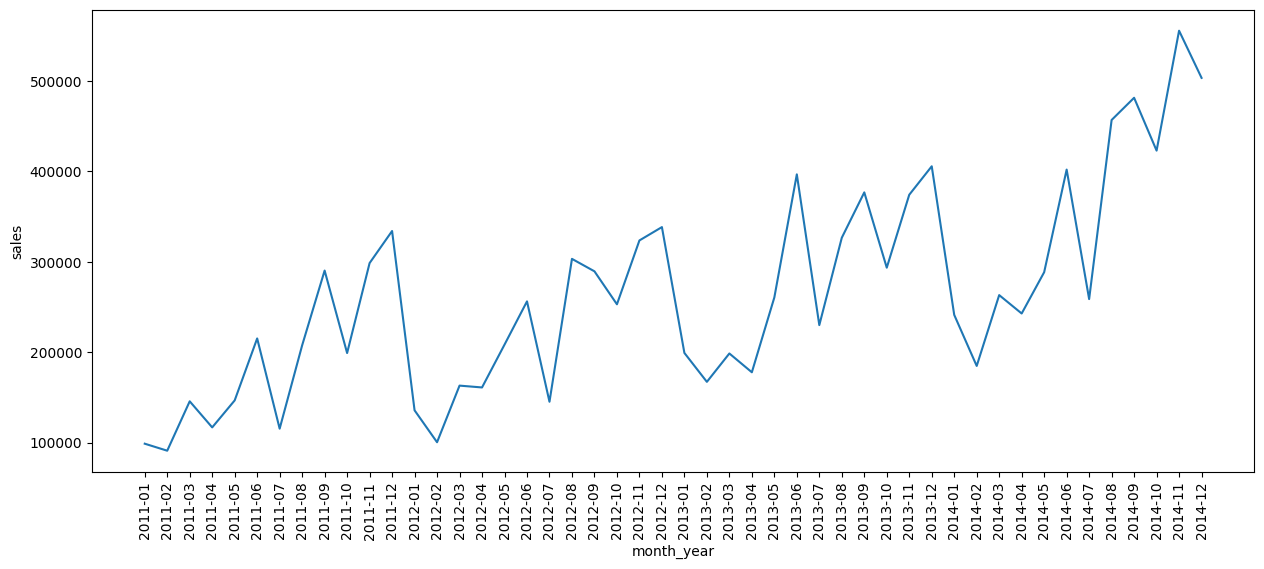

In [13]:
#Showing monthly sales trend
plt.figure(figsize=(15,6))
sns.lineplot(x='month_year', y='sales', data=df_monthly_trend)
plt.xticks(rotation = 'vertical')
plt.show()

#### WHAT ARE THE TOP 10 PRODUCTS BY SALES?

In [14]:
#Grouping Sales by product name
product_sales = pd.DataFrame(sales_data.groupby('product_name').sum()['sales']).reset_index()
product_sales = product_sales.sort_values(by='sales', ascending=False)

In [15]:
#Top 10 products by sales
product_sales[:10]

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


#### WHAT ARE THE MOST SELLING PRODUCTS?

In [16]:
#Grouping Quantity by product name
most_sold_product = pd.DataFrame(sales_data.groupby('product_name').sum()['quantity']).reset_index()
most_sold_product = most_sold_product.sort_values(by='quantity', ascending=False)

In [17]:
most_sold_product[:10]

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


#### WHAT IS THE MOST PREFERRED SHIP MODE?

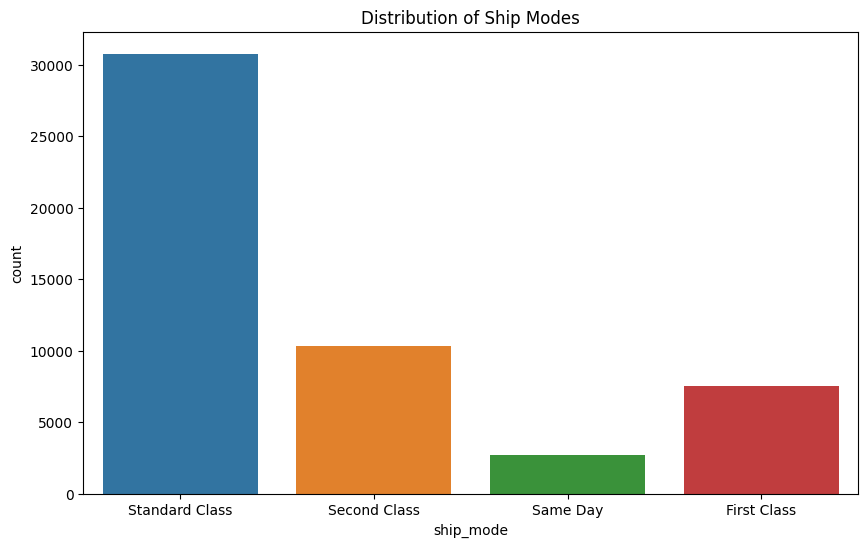

In [18]:
#Plotting count of each ship mode
plt.figure(figsize=(10,6))
sns.countplot(data=sales_data, x='ship_mode')
plt.title('Distribution of Ship Modes')
plt.show()

#### WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [19]:
#Grouping data by category and sub-category
sales_profit = pd.DataFrame(sales_data.groupby(['category', 'sub_category']).sum()['profit'])
sales_profit = sales_profit.sort_values(['category', 'profit'], ascending=False)
sales_profit

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

#### Who is our largest customer segment?

In [20]:
#Grouping data by customer segment
sales_segment = pd.DataFrame(sales_data.groupby('segment').sum()[['sales', 'quantity', 'profit']]).reset_index()
sales_segment = sales_segment.sort_values(by=['sales', 'quantity', 'profit'], ascending=False)
sales_segment

,segment,sales,quantity,profit
0,Consumer,6.507949e+06,92157,749239.78206
1,Corporate,3.824698e+06,53565,442785.85866
2,Home Office,2.309855e+06,32590,277009.18056


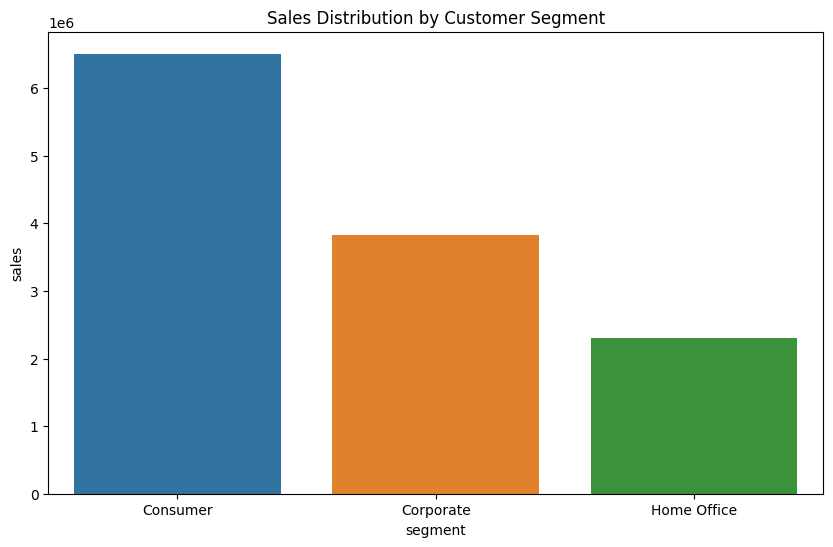

In [21]:
#Showing sales by each customer segment
plt.figure(figsize=(10,6))
sns.barplot(data=sales_segment, x='segment', y='sales')
plt.title('Sales Distribution by Customer Segment')
plt.show()

In [22]:
#Calculating sales percentage 
total_sales = sales_segment['sales'].sum()
sales_segment['sales_percentage'] = sales_segment['sales']/total_sales * 100

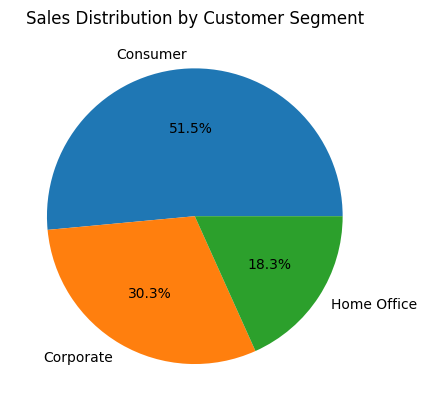

In [23]:
plt.pie(sales_segment['sales_percentage'], labels=sales_segment['segment'], autopct='%1.1f%%')
plt.title('Sales Distribution by Customer Segment')
plt.show()